Nhãn: Abuse
Extracted 5 segments from dataset/Test\Abuse\Abuse028_x264.mp4, each with 5 frames.
Extracted 6 segments from dataset/Test\Abuse\Abuse030_x264.mp4, each with 5 frames.
Nhãn: Arrest
Extracted 8 segments from dataset/Test\Arrest\Arrest001_x264.mp4, each with 5 frames.
Extracted 11 segments from dataset/Test\Arrest\Arrest007_x264.mp4, each with 5 frames.
Extracted 9 segments from dataset/Test\Arrest\Arrest024_x264.mp4, each with 5 frames.
Extracted 15 segments from dataset/Test\Arrest\Arrest030_x264.mp4, each with 5 frames.
Extracted 18 segments from dataset/Test\Arrest\Arrest039_x264.mp4, each with 5 frames.
Nhãn: Arson
Extracted 14 segments from dataset/Test\Arson\Arson007_x264.mp4, each with 5 frames.
Extracted 5 segments from dataset/Test\Arson\Arson009_x264.mp4, each with 5 frames.
Extracted 11 segments from dataset/Test\Arson\Arson010_x264.mp4, each with 5 frames.
Extracted 5 segments from dataset/Test\Arson\Arson011_x264.mp4, each with 5 frames.
Extracted 6 segments fro

Testing loss 2.0380 acc 0.4745: 100%|██████████| 36/36 [05:59<00:00,  9.99s/batch]


Độ chính xác cao nhất: 0.4745
Test Loss: 2.0380 | Test Accuracy: 0.4745
Number of test samples: 2293
Number of correct predictions: 1088
Number of wrong predictions: 1205
Classification Report:
               precision    recall  f1-score   support

        Abuse     0.0000    0.0000    0.0000        11
       Arrest     0.0000    0.0000    0.0000        61
        Arson     0.2727    0.0789    0.1224        76
      Assault     0.0000    0.0000    0.0000        40
     Burglary     0.0896    0.0448    0.0597       134
    Explosion     0.0000    0.0000    0.0000       176
     Fighting     0.0000    0.0000    0.0000        38
       Normal     0.5624    0.9126    0.6959      1156
RoadAccidents     0.0000    0.0000    0.0000       117
      Robbery     0.0000    0.0000    0.0000        30
     Shooting     0.0000    0.0000    0.0000       181
  Shoplifting     0.5000    0.0582    0.1043       189
     Stealing     0.0621    0.1961    0.0943        51
    Vandalism     0.0000    0.0000 

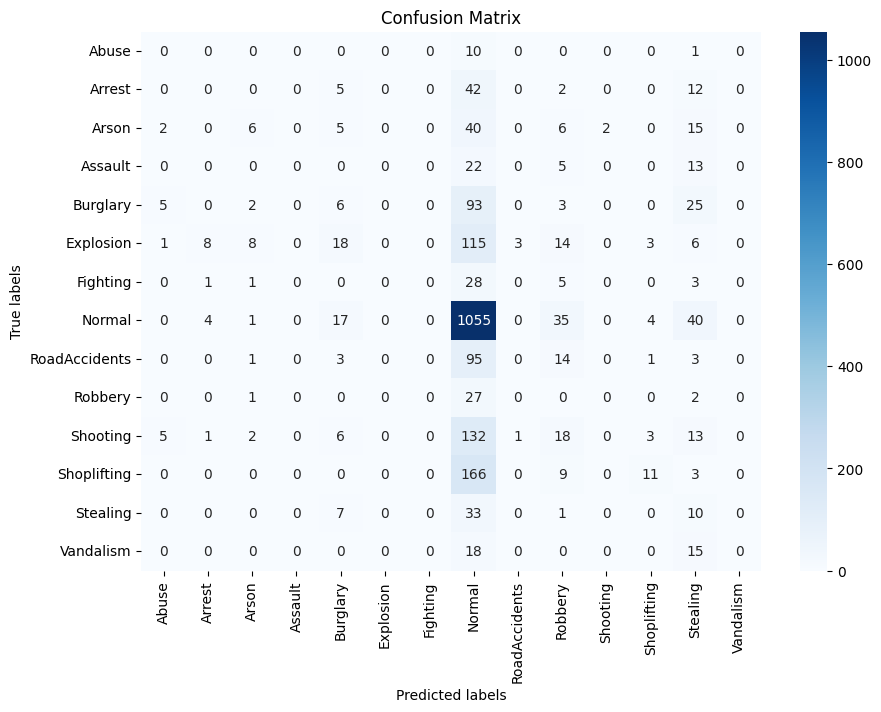

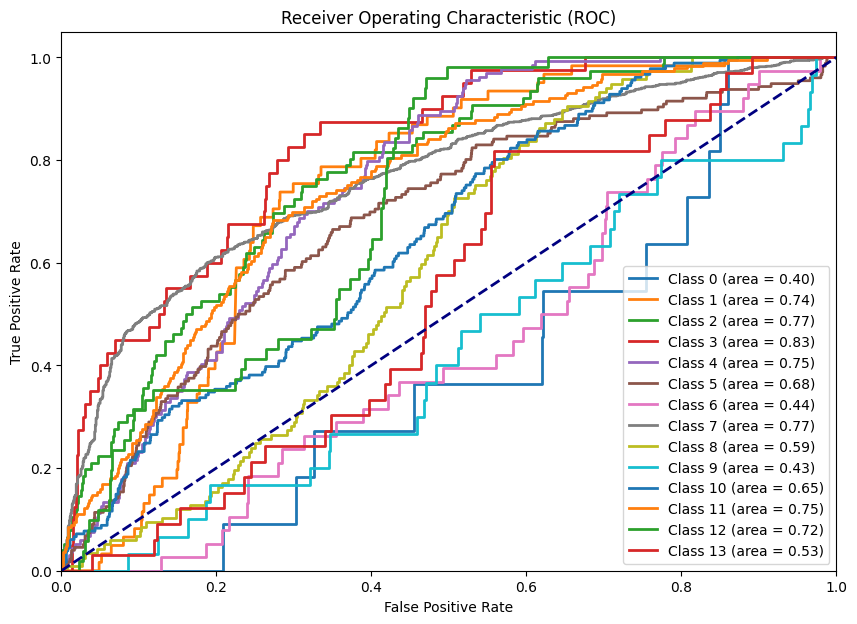

In [ ]:
#%%

import os
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
import numpy as np
from models import ModelResNet18SingleFrame
from models import ModelResNet18LateFrame
from models import ModelResNet18EarlyFrame
from models import ModelResNet18CNN_LSTM
from models import S3D
from dataset import create_dataset
from dataset import create_test_dataset
from dataset import CrimeDataset
from keras.utils import to_categorical
from test_model import test_model
from test_model import evaluate_precision_recall_f1
from test_model import plot_confusion_matrix
from test_model import plot_roc_curve

SEED = 24
EPOCHS = 15
BATCH_SIZE = 64
CLASSES_LIST = ["Abuse", "Arrest", "Arson", "Assault", "Burglary", "Explosion", "Fighting", "Normal",  "RoadAccidents", "Robbery", "Shooting", "Shoplifting", "Stealing", "Vandalism"]
IMAGE_HEIGHT , IMAGE_WIDTH = 100, 100
NUM_CLASSES = 14
LEARNING_RATE = 1e-3
# labels = to_categorical(labels, num_classes=NUM_CLASSES)
test_features, test_labels, test_video_files_paths = create_test_dataset()

# Transformations (if any)
transform = transforms.Compose([
    transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
    transforms.ToTensor(),
])

dataset = CrimeDataset(test_features, test_labels, transform=transform)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
print(f"Number of test samples: {len(dataset)}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = S3D(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load('models/model_S3D.pth'))
criterion = nn.CrossEntropyLoss()
# Test the model
test_loss, test_acc, all_preds, all_probs, all_labels, history = test_model(model, test_loader, criterion,device=device)

# Evaluate metrics
evaluate_precision_recall_f1(all_preds, all_labels, CLASSES_LIST)
plot_confusion_matrix(all_labels, all_preds, CLASSES_LIST)
plot_roc_curve(all_labels, all_probs, NUM_CLASSES)